In [1]:
import openfermionpyscf as ofpyscf
import openfermion as of
import cirq
import openfermioncirq as ofc
import numpy as np
import pyscf

In [2]:
from openfermion.transforms import get_fermion_operator, jordan_wigner, bravyi_kitaev
geometry = [["H", [0, 0, 0]],
            ["H", [0, 0, 0.7414]]]
basis = "sto-3g"
multiplicity = 1
charge = 0
hamiltonian = ofpyscf.generate_molecular_hamiltonian(geometry, basis, multiplicity, charge)
hamiltonian_jw = jordan_wigner(hamiltonian)
print(hamiltonian_jw)

-0.0988639693354571 [] +
-0.045322202052874 [X0 X1 Y2 Y3] +
0.045322202052874 [X0 Y1 Y2 X3] +
0.045322202052874 [Y0 X1 X2 Y3] +
-0.045322202052874 [Y0 Y1 X2 X3] +
0.17119774903432944 [Z0] +
0.16862219158920938 [Z0 Z1] +
0.120544822053018 [Z0 Z2] +
0.165867024105892 [Z0 Z3] +
0.17119774903432947 [Z1] +
0.165867024105892 [Z1 Z2] +
0.120544822053018 [Z1 Z3] +
-0.22278593040418496 [Z2] +
0.17434844185575687 [Z2 Z3] +
-0.22278593040418496 [Z3]


In [3]:
from openfermion.hamiltonians import MolecularData
molecule = MolecularData(geometry, basis, multiplicity, charge)
h2_molecule = ofpyscf.run_pyscf(molecule, run_mp2=True, run_cisd=True, run_ccsd=True, run_fci=True)
elektron=h2_molecule.n_electrons
orbitals = h2_molecule.n_orbitals
qubit= h2_molecule.n_qubits

In [5]:
from openfermion.utils import uccsd_singlet_generator
#a = np.linspace(-0.04, 0.04, 2)
#b = np.linspace(-0.03, 0.03, 2)

#initial_amplitudes= np.meshgrid(a,b)
initial_amplitudes = np.linspace(1,2,2)
#membuat ansatz UCCSD
uccsd_fermion=uccsd_singlet_generator(initial_amplitudes,qubit,elektron)
print(uccsd_fermion)


-1.0 [0^ 2] +
-2.0 [0^ 2 1^ 3] +
-1.0 [1^ 3] +
-2.0 [1^ 3 0^ 2] +
1.0 [2^ 0] +
2.0 [2^ 0 3^ 1] +
1.0 [3^ 1] +
2.0 [3^ 1 2^ 0]


In [5]:
# ansatz dirubah dari fermion operator menjadi qubit operator
uccsd_jw=jordan_wigner(uccsd_fermion)

print(uccsd_jw)

-0.5j [X0 X1 X2 Y3] +
-0.5j [X0 X1 Y2 X3] +
0.5j [X0 Y1 X2 X3] +
-0.5j [X0 Y1 Y2 Y3] +
-0.5j [X0 Z1 Y2] +
0.5j [Y0 X1 X2 X3] +
-0.5j [Y0 X1 Y2 Y3] +
0.5j [Y0 Y1 X2 Y3] +
0.5j [Y0 Y1 Y2 X3] +
0.5j [Y0 Z1 X2] +
-0.5j [X1 Z2 Y3] +
0.5j [Y1 Z2 X3]


In [6]:
#Membuat Sirkuit Ansatz /Fungsi Gelombang Coba 
class Ansatz(ofc.VariationalAnsatz):
    def params(self):      
        return [cirq.Symbol('theta_0'),cirq.Symbol('theta_1')]
    def operations(self, qubits):    
        q0, q1, q2, q3 = qubits
       # yield cirq.H(q0),cirq.H(q1),cirq.H(q2)
       # yield cirq.XPowGate(exponent=1.5707963267948966).on(q3)
       # yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
       # yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q3)
       # yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
       # yield cirq.H(q0),cirq.H(q1),cirq.H(q2)
       # yield cirq.XPowGate(exponent=-1.5707963267948966).on(q3)
        
        #yield cirq.H(q0),cirq.H(q1)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        #yield cirq.H(q3)
        #yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        #yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q3)
        #yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        #yield cirq.H(q0),cirq.H(q1)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        #yield cirq.H(q3)
        
       # yield cirq.H(q0)
       # yield cirq.XPowGate(exponent=1.5707963267948966).on(q1)
       # yield cirq.H(q2),cirq.H(q3)
       # yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
       # yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q3)
       # yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
       # yield cirq.H(q0)
       # yield cirq.XPowGate(exponent=-1.5707963267948966).on(q1)
        #yield cirq.H(q2),cirq.H(q3)
        
        #yield cirq.H(q0)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q1)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q3)
        #yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        #yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q3)
        #yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        #yield cirq.H(q0)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q1)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q3)
        
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        #yield cirq.H(q1),cirq.H(q2),cirq.H(q3)
        #yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        #yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q3)
        #yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        #yield cirq.H(q1),cirq.H(q2),cirq.H(q3)
        
        
       # yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        #yield cirq.H(q1)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q3)
        #yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        #yield cirq.ZPowGate(exponent=cirq.Symbol('theta_0')).on(q3)
        #yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        #yield cirq.H(q1)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q3)
        
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q1)
        #yield cirq.H(q2)
        #yield cirq.XPowGate(exponent=1.5707963267948966).on(q3)
        #yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        #yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q3)
        #yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q1)
        #yield cirq.H(q2)
        #yield cirq.XPowGate(exponent=-1.5707963267948966).on(q3)
        
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q0)
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q1)
        yield cirq.XPowGate(exponent=1.5707963267948966).on(q2)
        yield cirq.H(q3)
        yield cirq.CNOT(q0,q1),cirq.CNOT(q1,q2),cirq.CNOT(q2,q3)
        yield cirq.ZPowGate(exponent=cirq.Symbol('theta_1')).on(q3)
        yield cirq.CNOT(q2,q3),cirq.CNOT(q1,q2),cirq.CNOT(q0,q1)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q0)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q1)
        yield cirq.XPowGate(exponent=-1.5707963267948966).on(q2)
        yield cirq.H(q3)
        
        
        
        
        
        
    def _generate_qubits(set):
        return cirq.LineQubit.range(4)

In [7]:
FungsiCoba=Ansatz()
print(FungsiCoba.circuit)


0: ───X^(-3/7)───@───────────────────────────────@─────────X^(3/7)───
                 │                               │
1: ───X^(-3/7)───X───@───────────────────────@───X─────────X^(3/7)───
                     │                       │
2: ───X^(-3/7)───────X───@───────────────@───X───X^(3/7)─────────────
                         │               │
3: ───H──────────────────X───Z^theta_1───X───H───────────────────────


In [9]:
#mendeklarasikan Hamiltonan yang akan ditinjau
objektif = ofc.HamiltonianObjective(hamiltonian_jw)

#membuat keadaan referensi
q0, q1, _, _ = FungsiCoba.qubits
keadaan_refensi = cirq.Circuit.from_ops(cirq.X(q0), cirq.X(q1))


study = ofc.VariationalStudy(
    name='VQE JW Hidrogen',
    ansatz=FungsiCoba,
    objective=objektif,
    preparation_circuit=keadaan_refensi)



In [42]:
#optimasi
algoritma = ofc.optimization.ScipyOptimizationAlgorithm(
    kwargs={'method': 'nelder-mead'},
    options={'maxiter': 100,'disp':True})


optimization_params = ofc.optimization.OptimizationParams(
    algorithm=algoritma,
    initial_guess=FungsiCoba.default_initial_params())


result = study.optimize(optimization_params)
#print('Nilai optimum: {}'.format(result.optimal_value))
#print("parameter optimasinya:")
print(result.optimal_parameters)
print(FungsiCoba.default_initial_params())
print(result.optimal_value)

Optimization terminated successfully.
         Current function value: -1.136388
         Iterations: 31
         Function evaluations: 61
[ 0.0097644  -0.00834586]
[0. 0.]
-1.1363882043260851


In [11]:
hasil=[]
xx=np.linspace(-0.01,0.01,100)
yy=np.linspace(-0.01,0.01,100)
for x in xx:
    for y in yy:
        param=[x,y]
        hasil+=[study.value_of(param)]

In [12]:
z=np.array(hasil).reshape(100,100)
c=z.transpose()

In [26]:
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
## for Palatino and other serif fonts use:
#rc('font',**{'family':'serif','serif':['Palatino']})
rc('text', usetex=True)

In [27]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

Text(0,0.5,'$\\theta_2$')

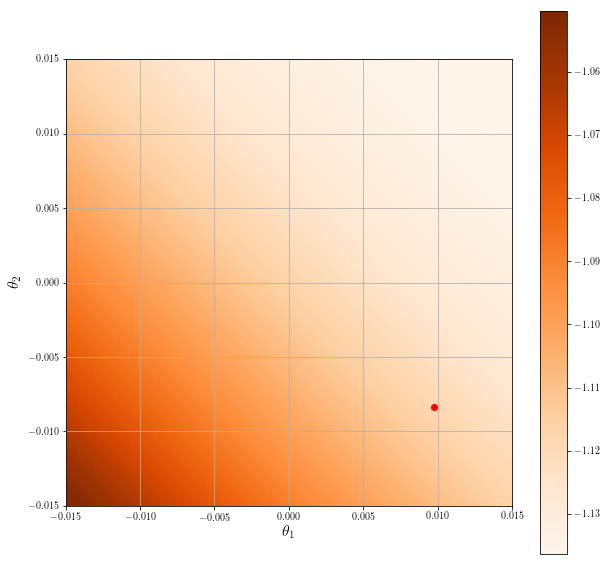

In [37]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(c,cmap='Oranges',extent=[-0.015,0.015,-0.015,0.015])
plt.colorbar()
plt.scatter(0.0097644 ,-0.00834586,color='r')
plt.grid()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)


In [14]:
#mendeklarasikan Hamiltonan yang akan ditinjau
objektif = ofc.HamiltonianObjective(hamiltonian_jw)

#membuat keadaan referensi
q0, q1, _, _ = FungsiCoba.qubits
keadaan_refensi = cirq.Circuit.from_ops(cirq.X(q0), cirq.X(q1))


study1 = ofc.VariationalStudy(
    name='VQE JW Hidrogen',
    ansatz=FungsiCoba,
    objective=objektif,
    preparation_circuit=keadaan_refensi)

In [15]:
#optimasi
algoritma = ofc.optimization.ScipyOptimizationAlgorithm(
    kwargs={'method': 'SLSQP'},
    options={'maxiter': 100,'disp':True})


optimization_params = ofc.optimization.OptimizationParams(
    algorithm=algoritma,
    initial_guess=FungsiCoba.default_initial_params())


result = study1.optimize(optimization_params)
print('Nilai optimum: {}'.format(result.optimal_value))
print("parameter optimasinya:")
print(result.optimal_parameters)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.1363881810313066
            Iterations: 4
            Function evaluations: 21
            Gradient evaluations: 4
Nilai optimum: -1.1363881810313066
parameter optimasinya:
[ 0.00974536 -0.00833692]


In [17]:
hasil=[]
xx=np.linspace(-0.01,0.01,100)
yy=np.linspace(-0.01,0.01,100)
for x in xx:
    for y in yy:
        param=[x,y]
        hasil+=[study1.value_of(param)]

In [19]:
SLQSP=np.array(hasil).reshape(100,100)
SLQSP_hasil=SLQSP.transpose()

Text(0,0.5,'$\\theta_2$')

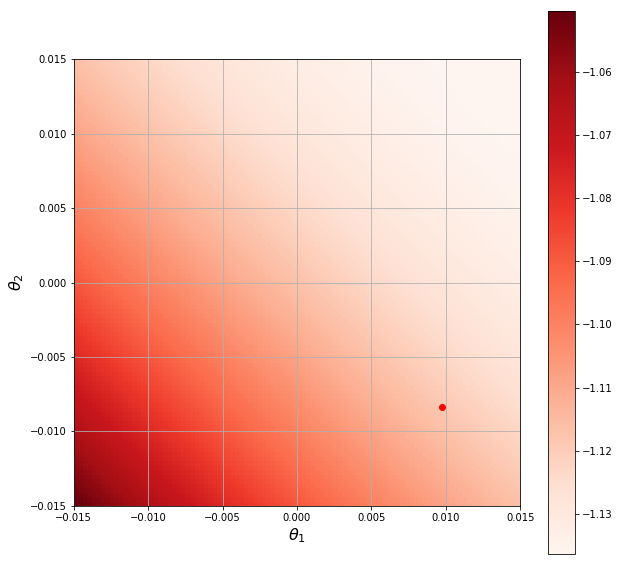

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.imshow(SLQSP_hasil,cmap='Reds',extent=[-0.015,0.015,-0.015,0.015])
plt.colorbar()
plt.scatter(0.00974536, -0.00833692,color='r')
plt.grid()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)

In [23]:
#mendeklarasikan Hamiltonan yang akan ditinjau
objektif = ofc.HamiltonianObjective(hamiltonian_jw)

#membuat keadaan referensi
q0, q1, _, _ = FungsiCoba.qubits
keadaan_refensi = cirq.Circuit.from_ops(cirq.X(q0), cirq.X(q1))


study2 = ofc.VariationalStudy(
    name='VQE JW Hidrogen',
    ansatz=FungsiCoba,
    objective=objektif,
    preparation_circuit=keadaan_refensi)

In [24]:
#optimasi
algoritma = ofc.optimization.ScipyOptimizationAlgorithm(
    kwargs={'method': 'Powell'},
    options={'maxiter': 100,'disp':True})


optimization_params = ofc.optimization.OptimizationParams(
    algorithm=algoritma,
    initial_guess=FungsiCoba.default_initial_params())


result = study2.optimize(optimization_params)
print('Nilai optimum: {}'.format(result.optimal_value))
print("parameter optimasinya:")
print(result.optimal_parameters)

Optimization terminated successfully.
         Current function value: -1.136225
         Iterations: 2
         Function evaluations: 57
Nilai optimum: -1.136225170114503
parameter optimasinya:
[ 0.01757231 -0.00071635]


In [25]:
hasil=[]
xx=np.linspace(-0.01,0.01,100)
yy=np.linspace(-0.01,0.01,100)
for x in xx:
    for y in yy:
        param=[x,y]
        hasil+=[study1.value_of(param)]

In [26]:
Powell=np.array(hasil).reshape(100,100)
POwell_hasil=Powell.transpose()

Text(0,0.5,'$\\theta_2$')

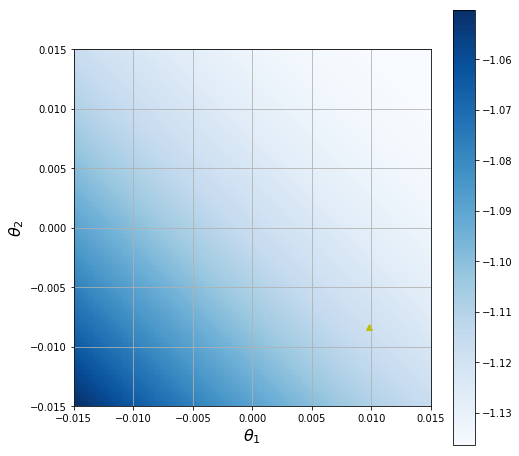

In [32]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
plt.imshow(SLQSP_hasil,cmap='Blues',extent=[-0.015,0.015,-0.015,0.015])
plt.colorbar()
plt.scatter(0.0097644 ,-0.00834586, marker='^',color='y')
plt.grid()
plt.xlabel(r'$\theta_1$',fontsize=16)
plt.ylabel(r'$\theta_2$',fontsize=16)

In [19]:
import numpy as np
a = np.linspace(-0.0097644, 0.0097644)
b = np.linspace(-0.00834586, 0.00834586)
ag,bg=np.meshgrid(a,b)
#hasil=[study.value_of([x,y]) for x, y in zip(ag, bg)]
#hasil1=[study.value_of([x,y]) for x in a for y in b]


In [20]:
g=np.array(hasil1)
print(a)

NameError: name 'hasil1' is not defined

In [ ]:
#print(hasil1,file=open("h2_jw_3.txt","a"))

In [ ]:
#print(hasil,file=open("h2_jw_1.txt","a"))

In [ ]:
##Proses pembacaan data dari .txt
data = open('./h2_jw_3.txt','r') #membaca input dalam satu folder
data = data.read().split(',')

##convert string ke float dalam array
data = np.array(data, dtype=float)
print(data)

In [ ]:
data = np.expand_dims(data, axis=1)
data.shape

In [ ]:
#plot pemetaan heatmap
import matplotlib.pyplot as plt

plt.imshow(data, extent=[-0.02, 0.02,-0.02, 0.02]) #pemetaan heatmap data dengan bentangan 0-5
plt.colorbar()    #agar keluar color barnya
plt.clim(-1.13,-1.14)
plt.scatter(0.0097644, -0.00834586)
#plt.scatter(-0.00834586,0.0097644)
#plt.savefig('./kemantenbaru.png')  #menyimpan gambar dalam satu folder
plt.show()

In [ ]:
from  openfermion . ops  import  InteractionOperator
x,y,z=molecule.get_active_space_integrals(occupied_indices=[0,1],active_indices=[0,1])
print(x)
print(y)

In [ ]:
from openfermion.transforms import get_sparse_operator
h2_matrix=get_sparse_operator(hamiltonian_jw).todense()
print(h2_matrix.shape)

In [ ]:
import cirq
import openfermioncirq as ofc
from openfermion.hamiltonians import MolecularData
from openfermionpyscf import run_pyscf


h2_molecule=MolecularData(geometry,basis,multiplicity,charge)
h2_molecule1 = run_pyscf(h2_molecule ,run_mp2=True ,run_cisd=True ,run_ccsd=True ,run_fci=True )
hamiltonian =h2_molecule1.get_molecular_hamiltonian()
qubits=cirq.LineQubit.range(4)
circuit = cirq.Circuit.from_ops(ofc.simulate_trotter(qubits, hamiltonian, time=1.0,n_steps=1,order=0,
                                                    algorithm=ofc.trotter.LOW_RANK,omit_final_swaps=True))
cirq.merge_single_qubit_gates_into_phased_x_z(circuit)
#print(circuit.to_text_diagram(use_unicode_characters=False))
#hubbard_hamiltonian = of.get_diagonal_coulomb_hamiltonian(get_fermion_operator(hamiltonian))
#ansatz = ofc.SwapNetworkTrotterAnsatz(hamiltonian,iterations=3)
